**Brian Blaylock**  
**September 3, 2019**

# MesoWest Multi-year Time Series
Generate a time series of the same station for multiple years

In [11]:
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/')
from BB_MesoWest.get_MesoWest import get_mesowest_ts
from BB_wx_calcs.units import C_to_F

from matplotlib.dates import DateFormatter
formatter = DateFormatter('%b-%d\n%H:%M')

import matplotlib.dates as mdates

In [12]:
mpl.rcParams['figure.figsize'] = [12,5]
mpl.rcParams['figure.titlesize'] = 12
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 12 #8
mpl.rcParams['ytick.labelsize'] = 12 #8
mpl.rcParams['axes.labelsize'] = 12 #8
mpl.rcParams['axes.titlesize'] = 12 #10
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 12 #7
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 300

In [50]:
years = range(2013, 2020)
station = 'UKBKB'
variable = 'air_temp'

DATA = {}
for year in years:
    sDATE = datetime(year, 9, 1)
    eDATE = datetime(year, 9, 3, 12)

    a = get_mesowest_ts(station, sDATE, eDATE, variables=variable, verbose=False)
    #DATES = [a['DATETIME'][i] for i in range(len(a[variable])) if np.isnan(a[variable][i]) == False]
    #var = [a[variable][i] for i in range(len(a[variable])) if np.isnan(a[variable][i]) == False]
    
    # For plotting purposes, convert date years to 2019 so they all stack.
    DATES = [datetime(2019, d.month, d.day, d.hour, d.minute) for d in a['DATETIME']]
    DATA[year] = [np.array(DATES), np.array(a[variable])]

v is: date_time
v is: air_temp
v is: date_time
v is: air_temp
v is: date_time
v is: air_temp
v is: date_time
v is: air_temp
v is: date_time
v is: air_temp
v is: date_time
v is: air_temp
v is: date_time
v is: air_temp


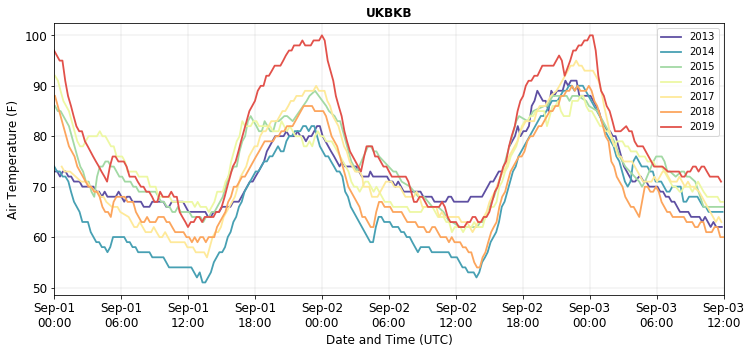

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)
NUM_COLORS = len(DATA.keys())
cm = plt.get_cmap('Spectral_r')
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for Y in DATA.keys():
    D = DATA[Y]
    plt.plot(D[0], C_to_F(D[1]), label=Y)

plt.legend(fontsize=10)

plt.title(station, fontweight='semibold')
plt.ylabel('Air Temperature (F)')
plt.xlabel('Date and Time (UTC)')
plt.grid()
plt.xlim([sDATE, eDATE])

plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
plt.gcf().axes[0].xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.gcf().axes[0].xaxis.set_minor_locator(mdates.HourLocator(range(0, 24, 24)))

#plt.savefig('CoalHollowFire_PM25')